In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
df=pd.read_csv('ALL_98samples.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,...,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
0,0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV4-34*01,319,292,1,1,292,1
1,1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1
2,2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,317,293,1,1,293,1
3,3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV3-23*01,319,295,1,1,295,1
4,4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,...,NaN,False,resultsBC_10_genotyped_db-pass-props.tab,IGHV1-69*01,319,295,1,1,295,1


In [1]:
df.head()

NameError: name 'df' is not defined

In [3]:
data = df
data.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
col = data.columns
print(col)

Index(['Unnamed: 0', 'CDR3_AA_ACIDIC', 'CDR3_AA_ALIPHATIC', 'CDR3_AA_AROMATIC',
       'CDR3_AA_BASIC', 'CDR3_AA_BULK', 'CDR3_AA_CHARGE', 'CDR3_AA_GRAVY',
       'CDR3_AA_LENGTH', 'CDR3_AA_POLARITY', 'DIAGNOSIS', 'CONSCOUNT',
       'D_CALL', 'D_GERM_LENGTH', 'D_GERM_START', 'D_SEQ_LENGTH',
       'D_SEQ_START', 'FUNCTIONAL', 'INDELS', 'IN_FRAME', 'JUNCTION',
       'JUNCTION_LENGTH', 'J_CALL', 'J_GERM_LENGTH', 'J_GERM_START',
       'J_SEQ_LENGTH', 'J_SEQ_START', 'MUTATED_INVARIANT', 'NP1_LENGTH',
       'NP2_LENGTH', 'PRCONS', 'PRIMER', 'SAMPLE', 'SEQORIENT', 'SEQUENCE_ID',
       'SEQUENCE_IMGT', 'SEQUENCE_INPUT', 'SEQUENCE_VDJ', 'SEX', 'STOP',
       'SUBJECT', 'V_CALL', 'V_GERM_LENGTH_IMGT', 'V_GERM_LENGTH_VDJ',
       'V_GERM_START_IMGT', 'V_GERM_START_VDJ', 'V_SEQ_LENGTH', 'V_SEQ_START'],
      dtype='object')


In [ ]:
# Remove irrelevant raws:
df1 = data

#remove samples with OR [non functional]
df2 = df1[~df1.V_CALL.str.contains('OR')]

#remove nonfunctional samples
   #df2 = df[~df.STOP.str.contains('True')]

# remove irrelevant junction length (minimum of 3 nucleutides for create AA), for translat to protein the sequence need to modulu 0 when diveded by 3
  #for create a protein the sequence need to contain minimum 4 AA, namely 12 nucleutides
df2 = df2[df2.JUNCTION_LENGTH%3==0]
df2 = df2[df2.JUNCTION_LENGTH>=12]

# remove rows with junction contains '-' , they can not be tranlate to AA
JUNCTION_index=np.where(df2['JUNCTION'].str.contains('-',regex=True))
JUNCTION_index_list= df2.iloc[JUNCTION_index].index.tolist()
df2 = df2.drop(df2.index[JUNCTION_index_list])
df2 = df2.reset_index(drop=True)

In [ ]:
# count raws per diagnosis class 
ax = sns.countplot(data['DIAGNOSIS'],label="Count")       
C, H = data['DIAGNOSIS'].value_counts()
print('Number of Celiac: ',C)
print('Number of Healthy : ',H)
print('Difference:',(C-H))
print('percentage: ', (C-H)/C)

In [4]:
# y includes our labels and x includes our features
y = data.DIAGNOSIS
list = ['Unnamed: 0','SUBJECT','DIAGNOSIS']
x = data.drop(list,axis = 1 )
x.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CONSCOUNT,...,SEQUENCE_VDJ,SEX,STOP,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,3,...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,NaN,False,IGHV4-34*01,319,292,1,1,292,1
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,6,...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,NaN,False,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,3,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,IGHV1-69*01,317,293,1,1,293,1
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,4,...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,NaN,False,IGHV3-23*01,319,295,1,1,295,1
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,5,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,IGHV1-69*01,319,295,1,1,295,1


In [16]:
x.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CONSCOUNT,...,SEQUENCE_VDJ,SEX,STOP,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,3,...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,NaN,False,IGHV4-34*01,319,292,1,1,292,1
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,6,...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,NaN,False,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,3,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,IGHV1-69*01,317,293,1,1,293,1
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,4,...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,NaN,False,IGHV3-23*01,319,295,1,1,295,1
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,5,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,NaN,False,IGHV1-69*01,319,295,1,1,295,1


In [ ]:
x.describe()

In [21]:
x_part =x.iloc[:,0:9]
x_part.head()


,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222


In [23]:
# first ten features
diagnosis_vec = y
data_features = x_part
data_n_2 = (data_features - data_features.mean()) / (data_features.std())              # standardization Z score
data_n_2.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY
0,-0.393522,-0.359850,0.946845,-0.887451,1.094921,-0.354178,0.250931,0.826462,-0.846443
1,-0.901431,0.756879,-0.761744,-0.603066,-0.286627,0.371768,1.468710,-0.452366,-0.631193
2,-0.472530,-0.423364,0.790844,-0.927265,0.662661,-0.357065,0.139564,1.082227,-0.888590
3,-0.207621,-1.448114,2.476274,-0.793771,0.775465,-0.357482,-0.576130,0.314931,-1.053459
4,-0.305736,0.209242,0.571286,-0.843214,1.259092,-0.358643,0.841429,0.570696,-1.444696


In [48]:
data_features = pd.concat([y,data_n_2],axis=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

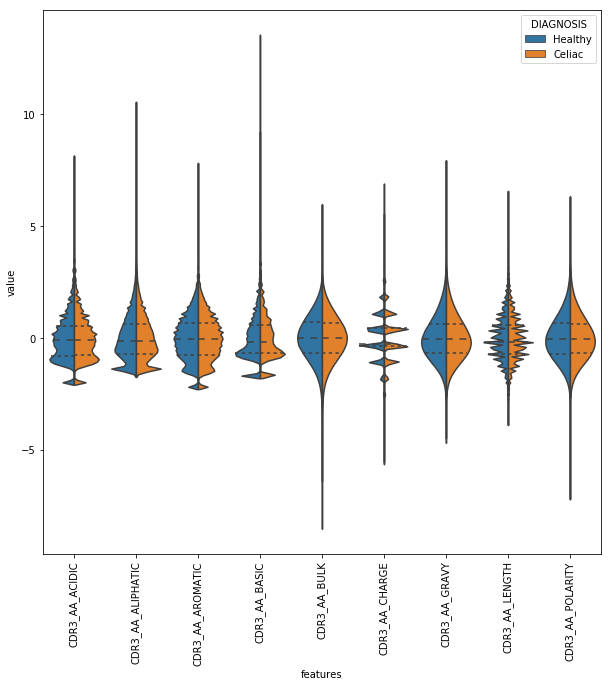

In [49]:
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

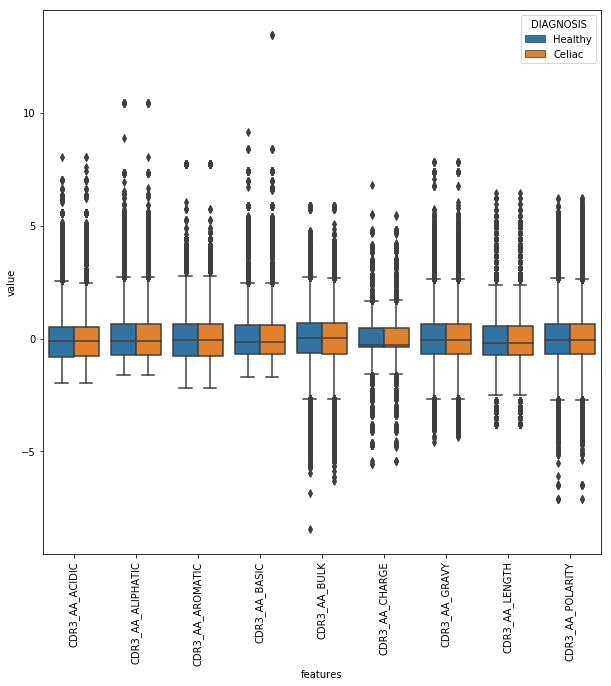

In [51]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="DIAGNOSIS", data=data_features)
plt.xticks(rotation=90)

## Feamale VS Male

Number of Feamale:  1308775
Number of Men :  504960
Difference: 803815
percentage:  0.6141735592443315


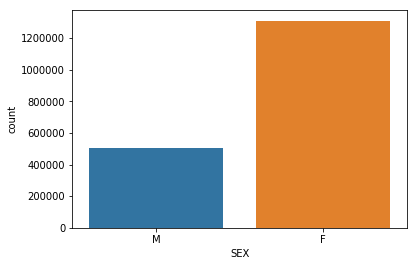

In [54]:
# cout raws per diagnosis class 
ax = sns.countplot(data['SEX'],label="Count")       
F, M = data['SEX'].value_counts()
print('Number of Feamale: ',F)
print('Number of Men : ',M)
print('Difference:',(F-M))
print('percentage: ', (F-M)/F)

In [56]:
df2 = data.dropna(subset=['SEX'])
df2.head()

,Unnamed: 0,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,...,SEX,STOP,SUBJECT,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
400928,0,0.176471,0.347059,0.117647,0.058824,11.997059,-2.148041,-0.394118,17.0,8.735294,...,M,False,resultsBiotech_045_genotyped_db-pass-props.tab,IGHV3-7*01,320,296,1,1,296,1
400929,1,0.181818,0.709091,0.090909,0.090909,12.813636,-0.999766,-0.336364,11.0,8.936364,...,M,False,resultsBiotech_045_genotyped_db-pass-props.tab,"IGHV3-30*18,IGHV3-NL1*01",319,50,1,246,50,1
400930,2,0.111111,0.600000,0.111111,0.166667,12.460000,0.998227,-0.122222,18.0,8.605556,...,M,False,resultsBiotech_045_genotyped_db-pass-props.tab,IGHV3-30-3*01,319,295,1,1,295,1
400931,3,0.062500,0.912500,0.000000,0.125000,13.378750,1.000300,0.331250,16.0,8.175000,...,M,False,resultsBiotech_045_genotyped_db-pass-props.tab,IGHV4-30-4*01,319,298,1,1,298,1
400932,4,0.176471,0.517647,0.352941,0.058824,14.546471,-2.156191,-0.300000,17.0,7.800000,...,M,False,resultsBiotech_045_genotyped_db-pass-props.tab,IGHV3-48*01,320,296,1,1,296,1


In [57]:
# y includes our labels and x includes our features
y_gender = data.SEX
list = ['Unnamed: 0','SUBJECT','DIAGNOSIS','SEX']
x_gender = data.drop(list,axis = 1 )
x_gender.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CONSCOUNT,...,SEQUENCE_INPUT,SEQUENCE_VDJ,STOP,V_CALL,V_GERM_LENGTH_IMGT,V_GERM_LENGTH_VDJ,V_GERM_START_IMGT,V_GERM_START_VDJ,V_SEQ_LENGTH,V_SEQ_START
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,3,...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,False,IGHV4-34*01,319,292,1,1,292,1
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,6,...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCCTGGTCAAGCCTGGGG...,False,"IGHV3-21*01,IGHV3-21*01_A85C",317,293,1,1,293,1
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,3,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,False,IGHV1-69*01,317,293,1,1,293,1
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,4,...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,False,IGHV3-23*01,319,295,1,1,295,1
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,5,...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,False,IGHV1-69*01,319,295,1,1,295,1


In [58]:
x_gender_part =x.iloc[:,0:9]
x_gender_part.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

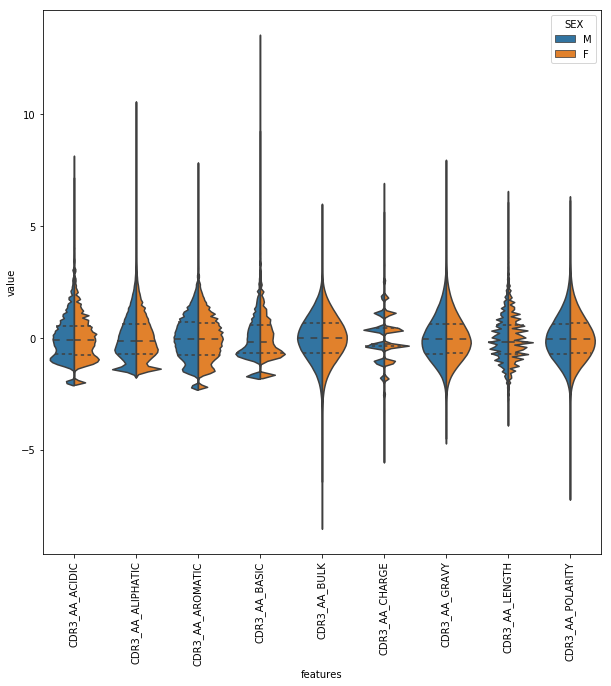

In [60]:
# first ten features
gender_vec = y_gender
data_features2 = x_gender_part
data_n_2_gender = (data_features2 - data_features2.mean()) / (data_features2.std())              # standardization
data2 = pd.concat([y_gender,data_n_2_gender],axis=1)
data2 = pd.melt(data2,id_vars="SEX",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="SEX", data=data2 ,split=True, inner="quart")
plt.xticks(rotation=90)

In [61]:
# לנסות לעשות פר גן מסויים את ההתפלגות

In [ ]:
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
list = ['Unnamed: 0','SUBJECT','DIAGNOSIS']
x = data.drop(list,axis = 1 )

x_part =x.iloc[:,1:9]

# first ten features
diagnosis_vec = y
data_features = x_part
data_n_2 = (data_features - data_features.mean()) / (data_features.std())              # standardization Z score
data_n_2.head()

data_features = pd.concat([y,data_n_2],axis=1)




In [ ]:
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="stick")
plt.xticks(rotation=90)


In [1]:
# violine of CDR3 properties per gene 


In [ ]:
# count raws per diagnosis class 
ax = sns.countplot(data['DIAGNOSIS'],label="Count")       
C, H = data['DIAGNOSIS'].value_counts()
print('Number of Celiac: ',C)
print('Number of Healthy : ',H)
print('Difference:',(C-H))
print('percentage: ', (C-H)/C)

